In [1]:
import keras
from keras import layers
from matplotlib import pyplot as plt

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [2]:
from credo import load_data
import numpy as np

(x_train, _), (x_test, _) = load_data(use_worms=True)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [3]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
86/86 [==============================] - 26s 15ms/step - loss: 0.2142 - val_loss: 0.0752
Epoch 2/50
86/86 [==============================] - 1s 10ms/step - loss: 0.0508 - val_loss: 0.0411
Epoch 3/50
86/86 [==============================] - 1s 12ms/step - loss: 0.0393 - val_loss: 0.0373
Epoch 4/50
86/86 [==============================] - 1s 9ms/step - loss: 0.0367 - val_loss: 0.0355
Epoch 5/50
86/86 [==============================] - 1s 10ms/step - loss: 0.0352 - val_loss: 0.0343
Epoch 6/50
86/86 [==============================] - 1s 10ms/step - loss: 0.0340 - val_loss: 0.0332
Epoch 7/50
86/86 [==============================] - 1s 11ms/step - loss: 0.0331 - val_loss: 0.0325
Epoch 8/50
86/86 [==============================] - 1s 11ms/step - loss: 0.0323 - val_loss: 0.0317
Epoch 9/50
86/86 [==============================] - 1s 9ms/step - loss: 0.0316 - val_loss: 0.0311
Epoch 10/50
86/86 [==============================] - 1s 9ms/step - loss: 0.0311 - val_loss: 0.0309
Epoch 11/50

16/16 [==============================] - 0s 5ms/step


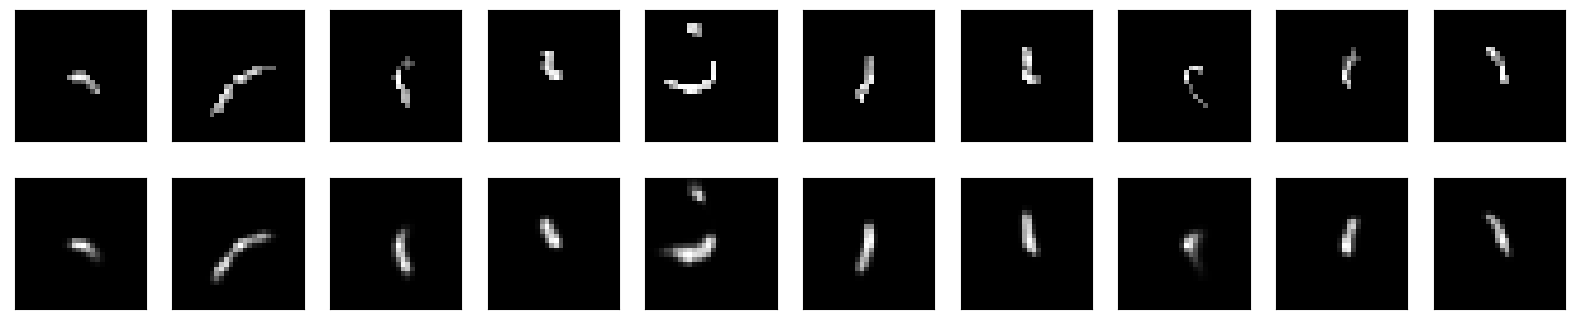

In [4]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

16/16 [==============================] - 0s 2ms/step


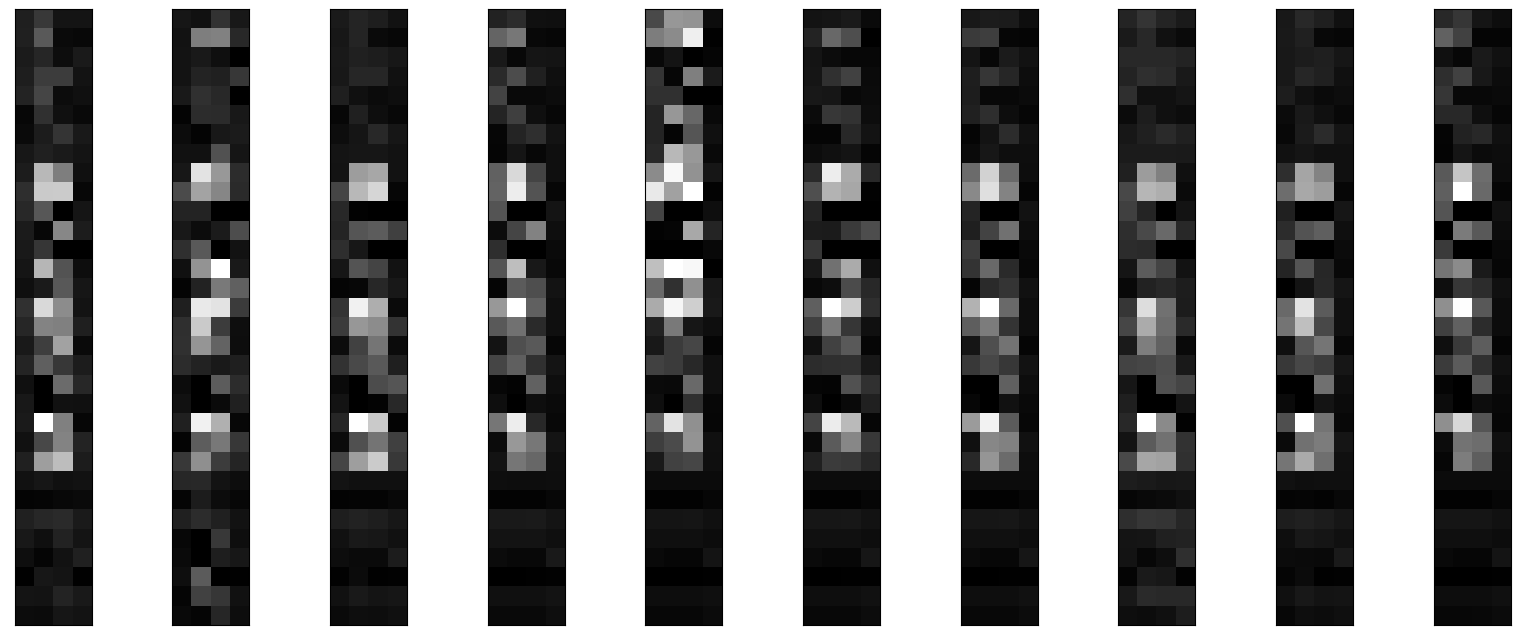

In [5]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()